In [840]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
import scipy.io

In [841]:
salinas_gt_mat=scipy.io.loadmat("Salinas_gt.mat")
salinas_corrected_mat=scipy.io.loadmat("Salinas_corrected.mat")
salinas_gt=salinas_gt_mat["salinas_gt"]
salinas_corrected=salinas_corrected_mat["salinas_corrected"]


# 1 ) pca uygulayacağım.

## standardizasyon

In [843]:
salinas_corrected.shape
X=salinas_corrected.reshape(salinas_corrected.shape[0]*salinas_corrected.shape[1],-1)#iki boyutlu hale getirdim.
print(X)
print(X.shape)

[[290 381 585 ...  36  11  17]
 [290 381 519 ...  36  11  15]
 [290 381 585 ...  30  11  11]
 ...
 [447 405 674 ...  42  11  23]
 [447 405 674 ...  42  17  27]
 [376 489 674 ...  42  15  23]]
(111104, 204)


In [844]:
rows,columns=X.shape
standardizedArray = np.zeros(shape=(rows, columns))
tempArray = np.zeros(rows)
print(standardizedArray)
print(standardizedArray.shape)
print(tempArray)
print(tempArray.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(111104, 204)
[0. 0. 0. ... 0. 0. 0.]
(111104,)


In [848]:
for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            tempArray = np.append(tempArray, ((element - mean) / std))
        standardizedArray[:,column] = tempArray

In [849]:
salinas_corrected_standardized=standardizedArray

In [850]:
len(np.unique(salinas_corrected_standardized))


345533

# 2)kovaryans matris bulunması ve eigen valuelar ve eigen vectorler bulunması

In [851]:
covariance_matrix=np.cov(salinas_corrected_standardized.T)
print(covariance_matrix.shape)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(len(eigen_values))
print(len(eigen_vectors))
print(eigen_values.shape)
print(eigen_vectors.shape)


(204, 204)
204
204
(204,)
(204, 204)


In [852]:
eigen_values

array([1.35251292e+02, 5.62129109e+01, 4.58481423e+00, 3.12920484e+00,
       1.71347778e+00, 9.39853138e-01, 4.81041701e-01, 4.01758036e-01,
       3.25575258e-01, 1.97235008e-01, 1.24781012e-01, 9.52583744e-02,
       8.85324601e-02, 6.81575726e-02, 5.82043060e-02, 4.91607210e-02,
       3.58697115e-02, 2.56349478e-02, 2.35676062e-02, 2.01290986e-02,
       1.57524340e-02, 1.33527095e-02, 1.23231700e-02, 9.07949873e-03,
       7.68627326e-03, 7.42326226e-03, 6.86921902e-03, 6.21929951e-03,
       5.44847159e-03, 4.75404877e-03, 4.28272810e-03, 4.00547228e-03,
       3.56246627e-03, 3.17916670e-03, 3.01069710e-03, 2.90647403e-03,
       2.76973731e-03, 2.44868167e-03, 2.35797016e-03, 2.21526017e-03,
       2.13128215e-03, 1.87359619e-03, 1.78646512e-03, 1.60167606e-03,
       1.54368743e-03, 1.52652136e-03, 1.37566377e-03, 1.28527069e-03,
       1.20098000e-03, 1.14211373e-03, 1.12644425e-03, 1.05273788e-03,
       9.70290713e-04, 9.20671148e-04, 8.77417802e-04, 8.32617941e-04,
      

# datanın değeri

In [853]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)


[66.29905604692878, 27.555100487018347, 2.247437725217506, 1.5339101336293828, 0.8399325290099793, 0.4607081757291771, 0.2358026332128147, 0.19693844135533098, 0.15959427835776427, 0.09668295723154029, 0.06116661199949633, 0.04669486130398262, 0.04339787416147033, 0.03341027408769596, 0.02853126576400741, 0.02409817576188439, 0.017583033648128615, 0.012566037765787642, 0.011552644177838824, 0.009867116363805625, 0.007721711851991932, 0.006545386934098405, 0.006040715248544499, 0.004450694614829451, 0.0037677470961124137, 0.003638821296429102, 0.003367233920524545, 0.0030486487928760354, 0.0026707953686278606, 0.0023303950908876306, 0.002099357625945049, 0.001963449129708654, 0.0017462912793288383, 0.0015584010221288017, 0.0014758186304046328, 0.0014247293499154731, 0.001357702145122799, 0.001200323348482944, 0.0011558573227114573, 0.0010859020764974676, 0.001044736749249649, 0.000918421239754386, 0.0008757103124638311, 0.0007851282585171453, 0.0007567027140473702, 0.0007482880471998209

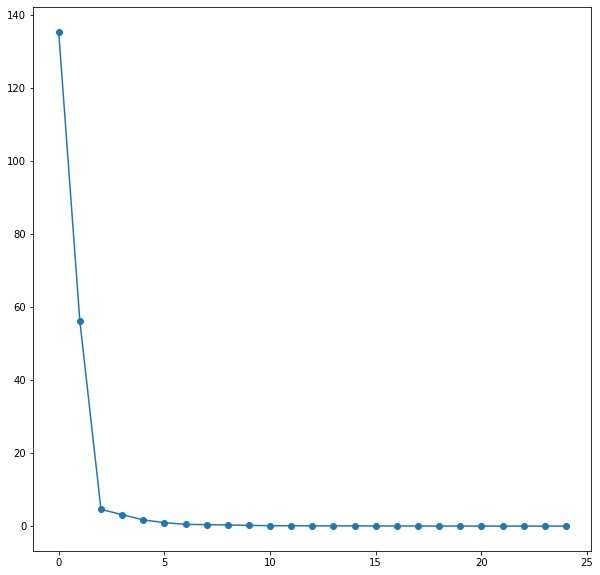

In [854]:
eigen_values1=eigen_values1[0:25]
x=np.arange(0,len(eigen_values1),1)
plt.figure(figsize=(10,10))
plt.plot(x,eigen_values1,marker = 'o')
plt.show()


In [855]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)
#birinci pca 66
#bir ve ikinci pca 93
#ilk üç pca 96
#kaç pca datanın ne kadarını ne kadar temsil ediyor tablosu.

[ 66.29905605  93.85415653  96.10159426  97.63550439  98.47543692
  98.9361451   99.17194773  99.36888617  99.52848045  99.62516341
  99.68633002  99.73302488  99.77642276  99.80983303  99.8383643
  99.86246247  99.8800455   99.89261154  99.90416419  99.9140313
  99.92175301  99.9282984   99.93433912  99.93878981  99.94255756
  99.94619638  99.94956361  99.95261226  99.95528306  99.95761345
  99.95971281  99.96167626  99.96342255  99.96498095  99.96645677
  99.9678815   99.9692392   99.97043953  99.97159538  99.97268128
  99.97372602  99.97464444  99.97552015  99.97630528  99.97706198
  99.97781027  99.97848461  99.97911464  99.97970335  99.98026321
  99.98081538  99.98133142  99.98180705  99.98225836  99.98268846
  99.9830966   99.98350107  99.98386764  99.98421303  99.98453514
  99.98484699  99.98514783  99.98544177  99.98572962  99.98600436
  99.98626678  99.98651242  99.98676339  99.98701498  99.98725848
  99.98749772  99.98772927  99.98795507  99.98817893  99.98840092
  99.9886196

# 3)eigen valuelarla eigen vectorlerin sıralanması

In [856]:

ind=np.arange(0,len(eigen_values),1)
print(ind)
#eigen value ile indis ndarrayini birleştiriyorum
#https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
ind=[x for _,x in sorted(zip(eigen_values,ind))]

print("\n")
print(ind)
ind=ind[::-1]#ters
print("\n")
print(ind)

eigen_values1=eigen_values[ind]
print("eigen values")
print(eigen_values1)
eigen_vectors1=eigen_vectors[:,ind]
print("eigenvectors")
print(eigen_vectors1)
eigen_vectors1=eigen_vectors1[:,:3]
print("eigenvectors")
print(eigen_vectors1)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203]


[98, 99, 100, 101, 102, 103, 121, 125, 134, 126, 124, 123, 122, 120, 119, 130, 129, 128, 139, 140, 133, 132, 131, 137, 138, 147, 148, 149, 160, 178, 161, 169, 168, 159, 

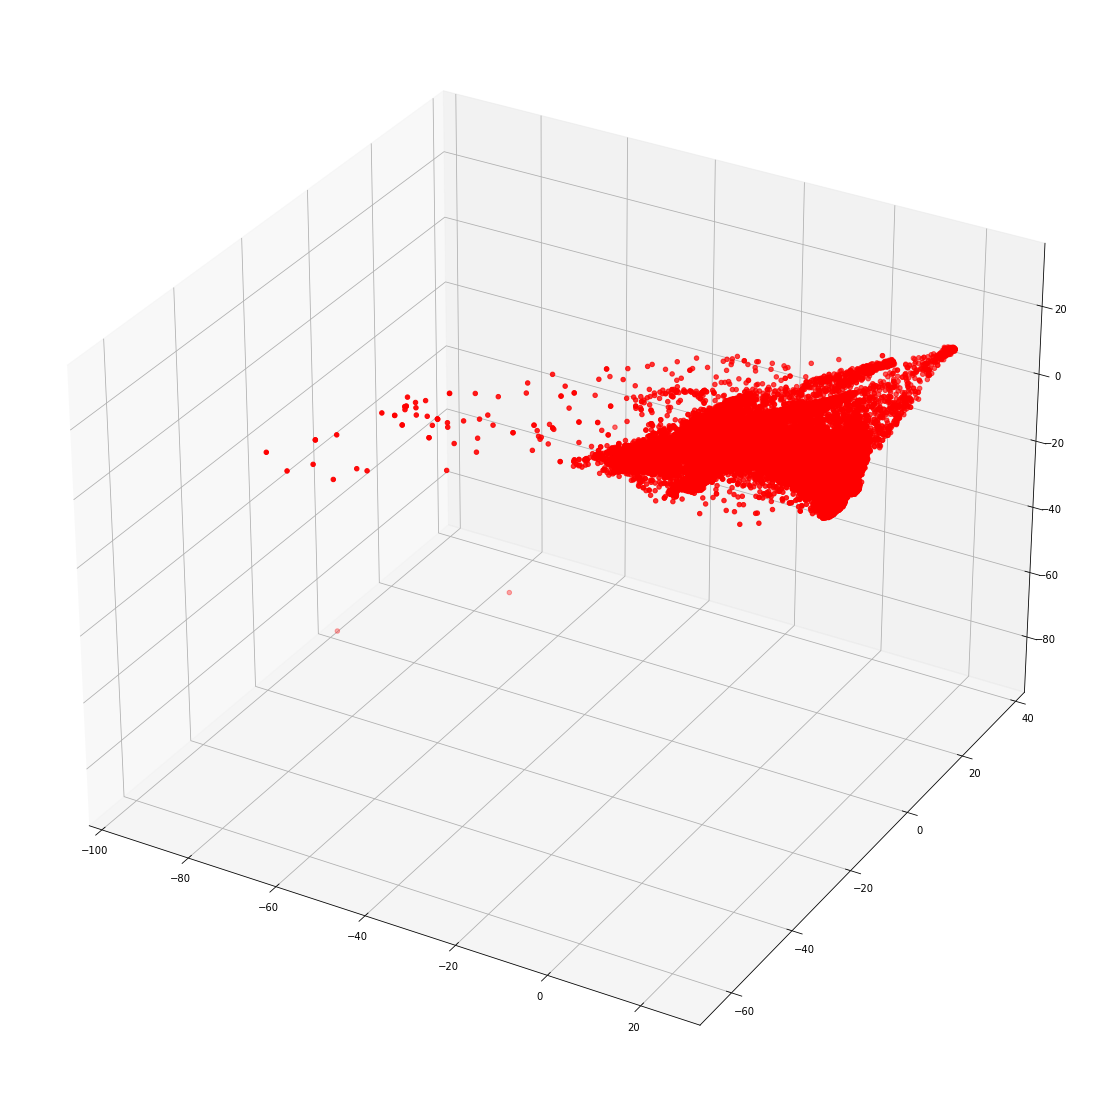

In [857]:
y=(eigen_vectors1.T).dot(salinas_corrected_standardized.T) 
fig = plt.figure(figsize = (20, 20))
ax = plt.axes(projection ="3d")
ax.scatter3D(y[0,:], y[1,:], y[2,:], color = "red")


#  5)projeksiyon matrix eldesi ve yeni değer = projeksiyon matrix * standardize edilmiş verimiz 

In [858]:
#projection_matrix derinliğini duruma göre değiştirebilirim. şu an 3 seçilmiş durumda.
projection_matrix = (eigen_vectors.T[:][:3]).T
                    
print(projection_matrix)
len(projection_matrix)
projection_matrix.shape



[[-0.03445322 -0.04877965  0.11162889]
 [-0.04086046 -0.04781838  0.12357284]
 [-0.05554669 -0.05066125  0.15979766]
 [-0.06477328 -0.05279639  0.18544928]
 [-0.06680216 -0.05375992  0.19123756]
 [-0.06758782 -0.05527652  0.18960374]
 [-0.06891672 -0.05434546  0.18560734]
 [-0.07073546 -0.05268961  0.17722195]
 [-0.07200166 -0.05147019  0.17005658]
 [-0.07278831 -0.05072598  0.1651594 ]
 [-0.07325654 -0.0504584   0.16135779]
 [-0.07367146 -0.05000061  0.15821631]
 [-0.07411811 -0.04935579  0.1550507 ]
 [-0.07453728 -0.04893792  0.15131312]
 [-0.07443683 -0.04993293  0.14951161]
 [-0.07312618 -0.05395686  0.15126223]
 [-0.07051711 -0.06052206  0.1541148 ]
 [-0.06852293 -0.06491055  0.15433547]
 [-0.06821255 -0.06585215  0.15030122]
 [-0.06921832 -0.06415458  0.14414088]
 [-0.07191929 -0.05869816  0.13453495]
 [-0.07459798 -0.05241448  0.12440324]
 [-0.07607349 -0.04859934  0.11668805]
 [-0.07684817 -0.04654326  0.11034605]
 [-0.07743596 -0.04483512  0.10484209]
 [-0.07811502 -0.04268831

(204, 3)

In [859]:
finaldataset_salinas=salinas_corrected_standardized.dot(projection_matrix)

In [860]:
o,a=finaldataset_salinas.shape

In [861]:
finaldataset_salinas.shape

(111104, 3)

In [862]:

print(np.unique(salinas_gt))
cluster=len(np.unique(salinas_gt))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


# hazır k means algoritması ile yapımı

In [863]:
finaldataset_salinas

array([[ 2.10479906, 12.41838246,  1.08513843],
       [ 1.9114104 , 12.3746361 ,  0.78283453],
       [ 2.39414335, 12.96400839,  0.90924263],
       ...,
       [-1.09835162, 12.07069595,  0.78436685],
       [-1.36397259, 12.00882227,  0.47759959],
       [-1.47386658, 11.77536964,  0.62181324]])

In [864]:
finaldataset_salinas=finaldataset_salinas.reshape(512,217,a)

In [865]:
(h,w,c)=finaldataset_salinas.shape

In [866]:
finaldataset_salinas=finaldataset_salinas.reshape(h*w,c)

In [867]:
from sklearn.cluster import KMeans

In [868]:
model = KMeans(n_clusters=17,n_init=35,algorithm="lloyd")# 35iterasyon ,17 cluster.

In [869]:
labels = model.fit_predict(finaldataset_salinas)

In [870]:
print(np.unique(labels))
labels.shape

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


(111104,)

In [871]:
model.cluster_centers_.shape


(17, 3)

In [872]:
model.cluster_centers_

array([[-3.32169845e+00, -1.72062115e+01,  2.90630139e+00],
       [ 2.43879891e+00,  1.39663565e+01,  1.99028316e+00],
       [-1.18047331e+01, -3.44698005e+00, -6.65840987e-01],
       [ 2.02214219e+01, -2.60742833e+00, -9.96871635e-01],
       [ 7.28479072e+00, -5.11821180e+00, -1.58199471e+00],
       [-7.28633406e+00,  3.51813516e+00, -4.82509837e-01],
       [ 1.32656142e+01,  2.75704997e+01,  6.83216319e+00],
       [ 1.91523118e+01, -7.93573905e+00,  2.38657267e+00],
       [ 9.74983785e+00,  2.44000622e+00, -1.79027505e+00],
       [-1.74105256e+01, -1.10871051e+01, -6.84370540e-01],
       [-9.05063159e+00, -2.35350293e+00,  6.63709752e+00],
       [ 5.07055337e-03, -9.40421868e-01, -1.42118753e+00],
       [-3.61019375e+00,  7.54366889e+00,  1.29872429e+00],
       [-4.15594157e+01, -3.77129905e+01,  1.99528796e+01],
       [-1.02694335e+01,  9.58459638e-02, -4.19057702e-01],
       [ 1.30714740e+01,  5.15430044e+00, -7.42303109e-01],
       [ 2.15235607e+01, -1.22587054e+01

In [873]:
cluster_salina=np.reshape(labels,(h,w))

In [874]:
cluster_salina.shape

(512, 217)

In [875]:
cluster_salina

array([[ 1,  1,  1, ...,  7,  7,  7],
       [ 1,  1,  1, ...,  7,  7,  7],
       [ 1,  1,  1, ...,  7,  7,  7],
       ...,
       [ 3, 15, 15, ...,  1,  1,  1],
       [ 3,  3, 15, ...,  1,  1,  1],
       [15, 15, 15, ...,  1,  1,  1]])

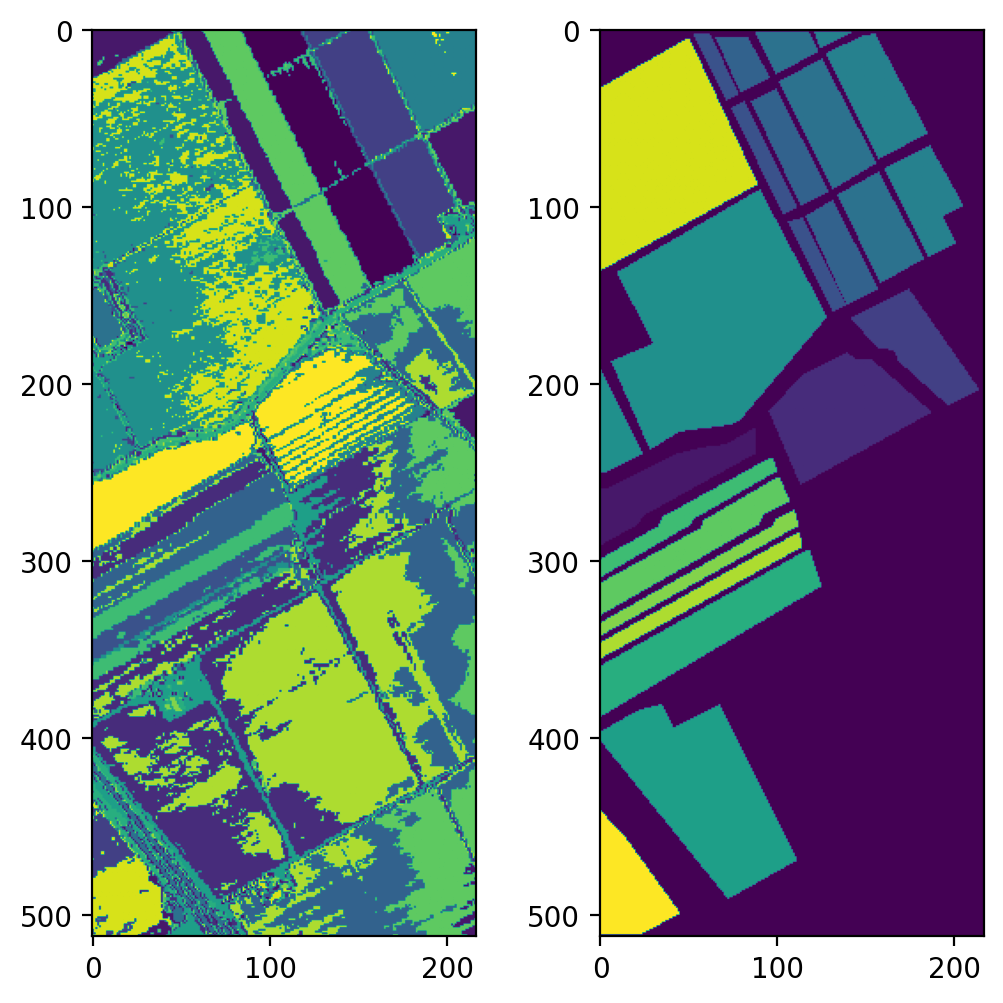

In [876]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(cluster_salina)
plt.subplot(1,2,2)
plt.imshow(salinas_gt)

# numpy k means ile yapımı

# lloyd k means

In [877]:
unique_salinas_gt=np.unique(salinas_gt)
cluster=len(np.unique(salinas_gt))#17
print(cluster)
print(unique_salinas_gt)

17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [878]:
#bu problem özelinde 3 boyut var(pca ile seçtim) hepsinin distance ını hesaplamak:
#for _ in range(n_init):
        #distances=np.sum(np.sqrt((X - centers[:, np.newaxis]) ** 2), axis=-1)
        #cluster_assignments = np.argmin(distances, axis=0)

In [879]:
#d_array=iki boyutlu datamız
#0
#cluster=cluster sayısı(17)unique ile bakmıştım.
#centers(random seçicez)
#n_init(kaç iterasyon yapılacağı)
#hep aynı sonucu vermesi için(random) seed belirtmemiz gerekir.


def lloyd_k_means(d_array_data,cluster,centers=None,n_init=35):
    np.random.seed(1)
    if centers is None:
        rnd_centers_idx = np.random.choice(np.arange(d_array_data.shape[0]), cluster, replace=False)
        centers = d_array_data[rnd_centers_idx]
    for _ in range(n_init):
        distances = np.sum(np.sqrt((d_array_data - centers[:, np.newaxis]) ** 2), axis=-1)#,#,<https://stackoverflow.com/questions/47544099/trying-to-understand-what-is-happening-in-this-python-function,https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis
        cluster_assignments = np.argmin(distances, axis=0)
        for i in range(cluster):
            msk = (cluster_assignments == i)
            centers[i] = np.mean(d_array_data[msk], axis=0) if np.any(msk) else centers[i]

    return cluster_assignments, centers,distances


In [880]:
finaldataset_salinas.shape

(111104, 3)

In [881]:
#cluster_assignment ,centers= k_means_a(finaldataset_salinas,17,centers=None, num_iter=35)
cluster_assignment ,centers,distances=lloyd_k_means(finaldataset_salinas,17,centers=None, n_init=35)
print(distances.max())
print(distances.min())
print(distances.shape)



235.88324496320436
0.030250038404364854
(17, 111104)


In [882]:
np.unique(cluster_assignment)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [883]:
centers.shape
print(centers)

[[ -9.98142893   0.52224718  -0.2999342 ]
 [  7.22785488  -4.41870272  -1.68218482]
 [ -3.46790354   7.69200985   1.37070775]
 [  2.47397588  14.00167601   2.00650709]
 [ 10.49451733   2.60653253  -1.80412982]
 [ 21.5198649  -12.26596743   0.8276269 ]
 [-17.3317654  -10.92004646  -0.49614645]
 [ 20.2084069   -2.5635917   -0.98037623]
 [ 19.11833233  -7.96531655   2.37525851]
 [ -8.18932574  -3.80993917  -0.81963087]
 [-41.55941574 -37.71299046  19.95287958]
 [ 13.14262146  27.55382095   6.92456955]
 [ -6.99360905   3.84782961  -0.24281648]
 [ -3.28978633 -17.03602262   2.93213836]
 [-12.11768372  -2.97740882  -0.15993185]
 [  0.5851086   -0.4108009   -1.60151848]
 [ 12.80619223   6.17737672  -0.23308096]]


In [884]:
cluster_assignment.shape

(111104,)

In [885]:
centers.shape# cluster sayısı ,17 satır 8 sütun.

(17, 3)

## burada 2d haline getiriyorum

In [886]:
cluster_salina2=np.reshape(cluster_assignment,(h,w))

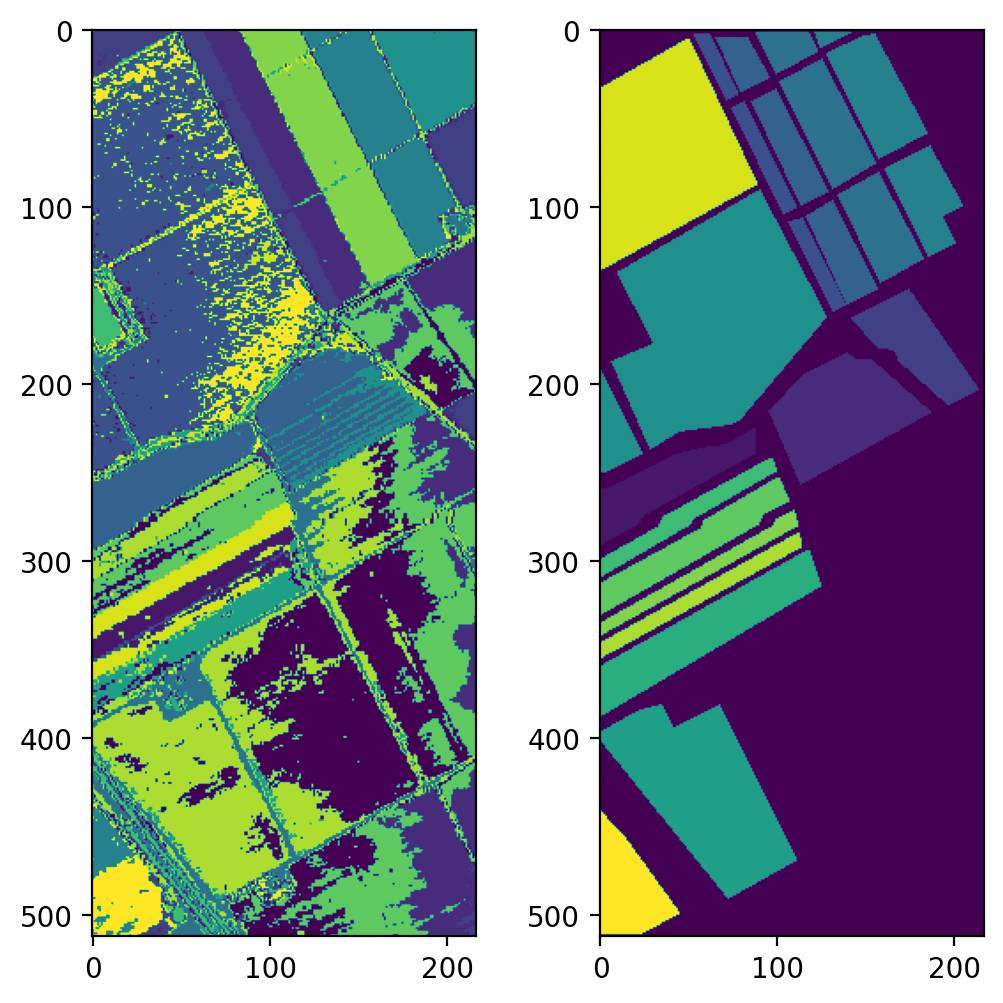

In [887]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(cluster_salina2)
plt.subplot(1,2,2)
plt.imshow(salinas_gt)

# accuracy hesabı

In [888]:
lloyd=np.logical_xor(salinas_gt,cluster_salina2)

In [889]:
print(np.size(lloyd))
print(lloyd.shape)
print(lloyd)

111104
(512, 217)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [890]:
verim=np.size(lloyd)-np.count_nonzero(lloyd)

In [891]:
lloyd_accuracy=verim/111104
print(lloyd_accuracy)

0.6011034706221198


In [892]:
512*217

111104

# yukarıda hazır sklearn k means ile bulduğumun accuracy hesabı

In [893]:
david_hilbert=np.logical_xor(salinas_gt,cluster_salina)
güzellik2=np.size(david_hilbert)-np.count_nonzero(david_hilbert)
hazir_k_means_accuracy=güzellik2/111104

In [894]:
print(hazir_k_means_accuracy)

0.45859735023041476


# bazı denemelerim

# accuracy otomasyonu:


In [895]:

np.unique(salinas_gt)
cluster=len(np.unique(salinas_gt))#17


In [896]:
for i in range(5):
    #for j in range(500):
        np.random.seed(1)
        projection_matrix = (eigen_vectors.T[:][:i]).T
        finaldataset_salinas=salinas_corrected_standardized.dot(projection_matrix)
        o,a=finaldataset_salinas.shape
        cl,centers,distances=lloyd_k_means(finaldataset_salinas,17,centers=None, n_init=35)
        cluster_salina3=np.reshape(cl,(h,w))
        lloyd2=np.logical_xor(salinas_gt,cluster_salina3)
        güzellik4=np.size(lloyd2)-np.count_nonzero(lloyd2)
        lloyd_accuracy=güzellik4/111104
        if(lloyd_accuracy>0.60):
            print(lloyd_accuracy)
            print(i)
            break;
        


0.6011034706221198
3


In [897]:
distances.shape

(17, 111104)

In [898]:

finaldataset_salinas[0]


array([ 2.10479906, 12.41838246,  1.08513843])

In [899]:
centers[0]

array([-9.98142893,  0.52224718, -0.2999342 ])

In [900]:
ga=np.sum(finaldataset_salinas[0]-centers[0])**2

In [901]:
np.sum(ga)

643.506803718858